### This notebook is the initial EDA performed on the telecom churn data set

In [1]:
# Imports
import pandas as pd
import seaborn as sns
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set options
pd.set_option('display.max_columns', None)
%matplotlib inline

In [3]:
# Load Telecom Churn csv as tc
tc = pd.read_csv('../data/raw/telecom_churn.csv')
tc.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
print('Shape of DataFrame:', tc.shape)
tc.info()

Shape of DataFrame: (3333, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charg

In [5]:
# Number of unique states
print('Number of states:', len(tc.state.unique()))
tc.state.unique()

Number of states: 51


array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [6]:
# Number of unique area codes
tc['area code'].unique()

array([415, 408, 510])

Are codes:  
    415, North West of San Fransico Bay  
    408, South East of San Fransico Bay  
    510, East of San Fransico Bay  
  
All area codes are in the San Fransico Bay area, but the states cover all 50 states and the District of Columbia.

In [7]:
# Count area codes by state to get a an idea of the distribution
area_codes = tc[['state', 'area code']].copy()
area_codes['area_code_count'] = 1
area_codes = area_codes.groupby(['state', 'area code'], as_index=False).count()
area_codes.head()

,state,area code,area_code_count
0,AK,408,14
1,AK,415,24
2,AK,510,14
3,AL,408,25
4,AL,415,40


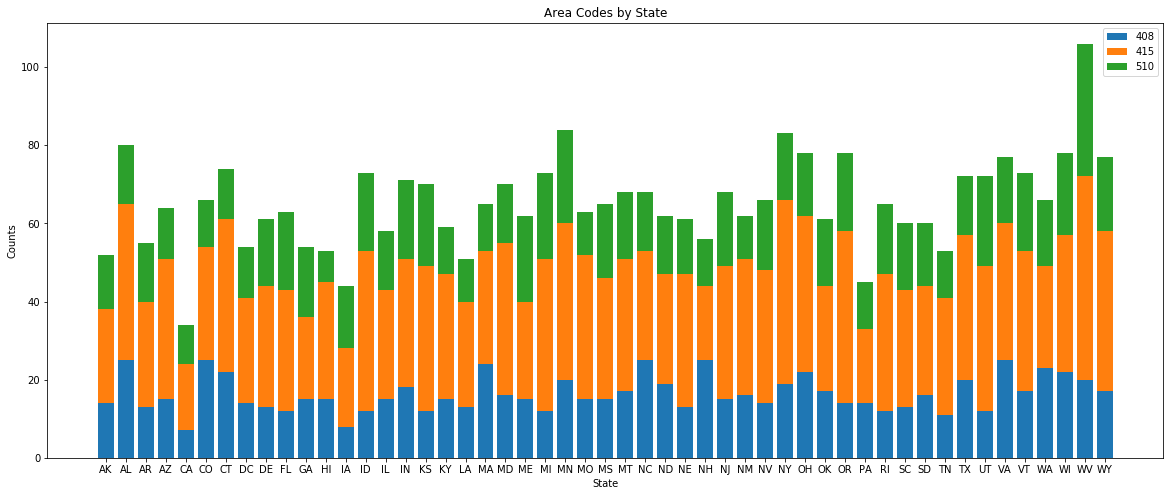

In [28]:
# Show a stacked bar chart of area code distributions
bars = bottom=np.add(four08.area_code_count.values, four15.area_code_count.values).tolist()
plt.figure(figsize=(20, 8))
plt.bar(four08.state, four08.area_code_count)
plt.bar(four15.state, four15.area_code_count, bottom=four08.area_code_count)
plt.bar(five10.state, five10.area_code_count, bottom=bars)
plt.title('Area Codes by State')
plt.ylabel('Counts')
plt.xlabel('State')
plt.legend(labels=['408', '415', '510']);

The above bar char shows that the area codes, and states are fairly evenly distributed. The most interesting aspect is that are the area codes are from the San Fransico Bay area, but California has the least number of entries in the dataset.

In [10]:
# Break up the phone numbers into parts to look for patterns in the prefixes
tc[['phone_prefix','phone_l4']] = tc['phone number'].str.split('-', n=1, expand=True)
tc.head(2)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,phone_prefix,phone_l4
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False,382,4657
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False,371,7191


In [11]:
# Find the number of unique prefixes
print('Number of prefixes:', len(tc.phone_prefix.unique()))
tc.phone_prefix.unique()

Number of prefixes: 96


array(['382', '371', '358', '375', '330', '391', '355', '329', '335',
       '344', '363', '394', '366', '351', '350', '386', '356', '373',
       '396', '393', '343', '331', '357', '418', '353', '410', '416',
       '370', '383', '360', '395', '362', '341', '402', '332', '372',
       '390', '352', '364', '398', '405', '413', '420', '349', '404',
       '340', '403', '359', '365', '338', '374', '415', '399', '333',
       '354', '419', '411', '388', '412', '346', '400', '334', '387',
       '327', '379', '347', '401', '397', '409', '337', '407', '328',
       '369', '408', '414', '345', '422', '381', '380', '336', '417',
       '406', '361', '377', '385', '378', '367', '339', '348', '342',
       '389', '368', '384', '376', '421', '392'], dtype=object)

In [12]:
# Look at the prefixes in each state to see if there is an correlation.
# Start by grouping the data by state and prefix
pfix = tc[['state', 'phone_prefix', 'phone_l4']].groupby(['state', 'phone_prefix'], as_index=False).count()\
        .rename(columns={'phone_l4' : 'count'})

In [13]:
pfix.head()

,state,phone_prefix,count
0,AK,330,1
1,AK,332,1
2,AK,333,2
3,AK,334,1
4,AK,336,2


In [14]:
# Show the maximum number of a prefix in a state
pfix['count'].max()

6

In [24]:
# Show count of prefix counts greater than or equal to 6.
pfix[pfix['count'] >= 6]

,state,phone_prefix,count
1844,RI,366,6
2320,WV,332,6


Prefixes also show little corelation to state with the maximum number of any prefix in a state being 6.

In [29]:
# What is the percentage of Churn?
sum(tc['churn']) / len(tc) * 100

14.491449144914492

This is an unbalanced dataset so accuracy would be a good measure of performance. Guessing no churn will be 85% accurate.

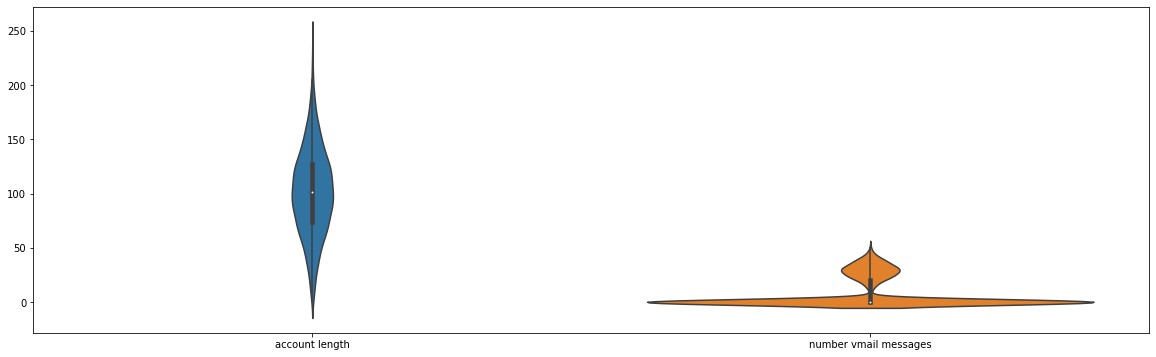

In [52]:
# Histogram for account length
plt.figure(figsize=(20, 6))
sns.violinplot(data=tc[['account length', 'number vmail messages']]);

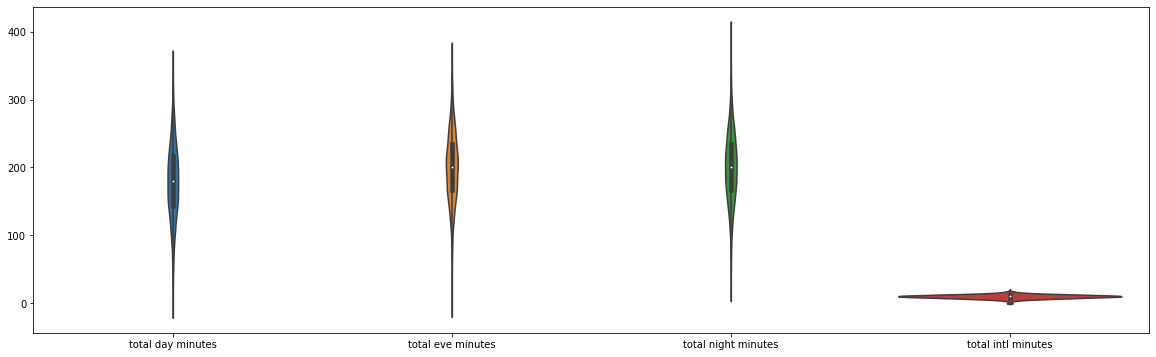

In [53]:
# Histogram for account length
plt.figure(figsize=(20, 6))
sns.violinplot(data=tc[['total day minutes', 'total eve minutes',
                        'total night minutes', 'total intl minutes']]);

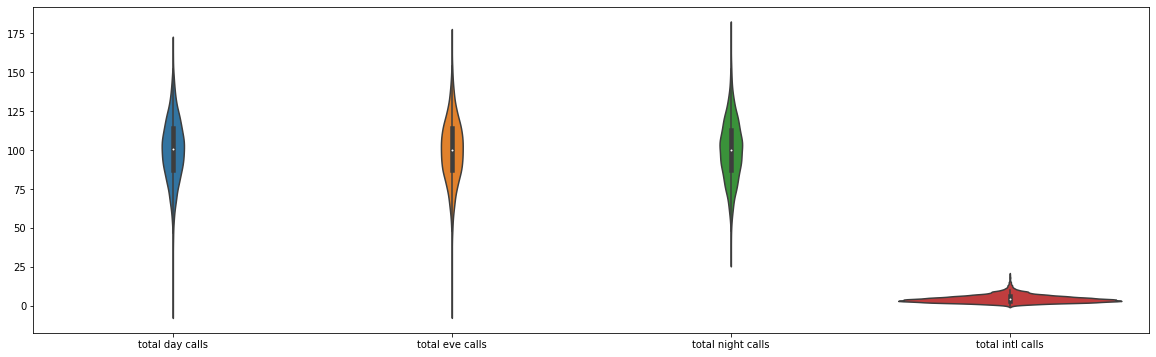

In [54]:
# Histogram for account length
plt.figure(figsize=(20, 6))
sns.violinplot(data=tc[['total day calls', 'total eve calls', 'total night calls', 'total intl calls']]);

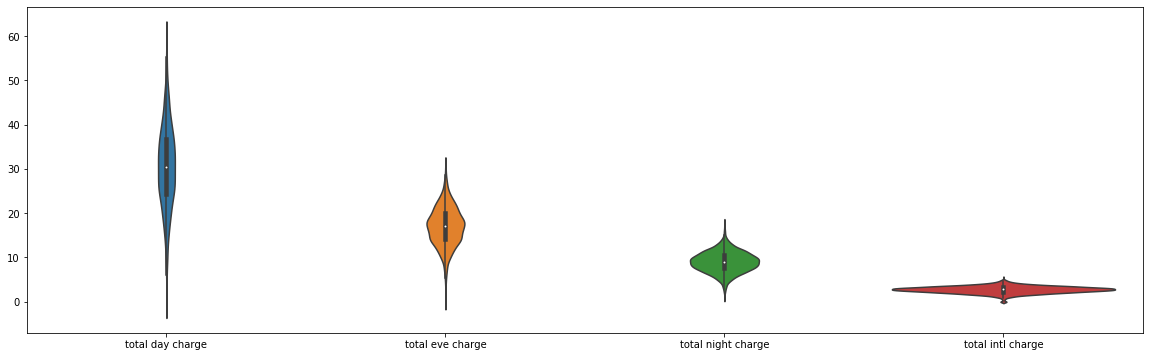

In [55]:
# Histogram for account length
plt.figure(figsize=(20, 6))
sns.violinplot(data=tc[['total day charge', 'total eve charge', 'total night charge', 'total intl charge']]);